In [8]:
# Import required libraries
from model_ import LogisticRegressionModel, RandomForestModel, GradientBoostingModel
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc


In [9]:
models = {
    'logistic_regression': LogisticRegressionModel(),
    'random_forest': RandomForestModel(),
    'gradient_boosting': GradientBoostingModel()
}


Training logistic_regression...


/Users/thejas/Desktop/Personal Projects/DSW Assignment/DSW_ML_Assignment-Dec24/model_.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[numerical_cols] = self.scaler.fit_transform(X[numerical_cols])
/Users/thejas/thejas/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/thejas/Desktop/Personal P


LOGISTIC_REGRESSION Results:

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.13      0.22      3055
           1       0.66      0.96      0.78      5400

    accuracy                           0.66      8455
   macro avg       0.66      0.55      0.50      8455
weighted avg       0.66      0.66      0.58      8455

ROC AUC Score: 0.6815
Average Precision Score: 0.7699

Training random_forest...


/Users/thejas/Desktop/Personal Projects/DSW Assignment/DSW_ML_Assignment-Dec24/model_.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[numerical_cols] = self.scaler.fit_transform(X[numerical_cols])
/Users/thejas/Desktop/Personal Projects/DSW Assignment/DSW_ML_Assignment-Dec24/model_.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[numerical_cols] = self.scaler.transform(X[numerical_cols])



RANDOM_FOREST Results:

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.25      0.36      3055
           1       0.69      0.92      0.79      5400

    accuracy                           0.68      8455
   macro avg       0.67      0.59      0.58      8455
weighted avg       0.67      0.68      0.63      8455

ROC AUC Score: 0.7002
Average Precision Score: 0.7914

Training gradient_boosting...


/Users/thejas/Desktop/Personal Projects/DSW Assignment/DSW_ML_Assignment-Dec24/model_.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[numerical_cols] = self.scaler.fit_transform(X[numerical_cols])



GRADIENT_BOOSTING Results:

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.29      0.39      3055
           1       0.69      0.90      0.78      5400

    accuracy                           0.68      8455
   macro avg       0.66      0.60      0.59      8455
weighted avg       0.67      0.68      0.64      8455

ROC AUC Score: 0.7035
Average Precision Score: 0.7955


/Users/thejas/Desktop/Personal Projects/DSW Assignment/DSW_ML_Assignment-Dec24/model_.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[numerical_cols] = self.scaler.transform(X[numerical_cols])


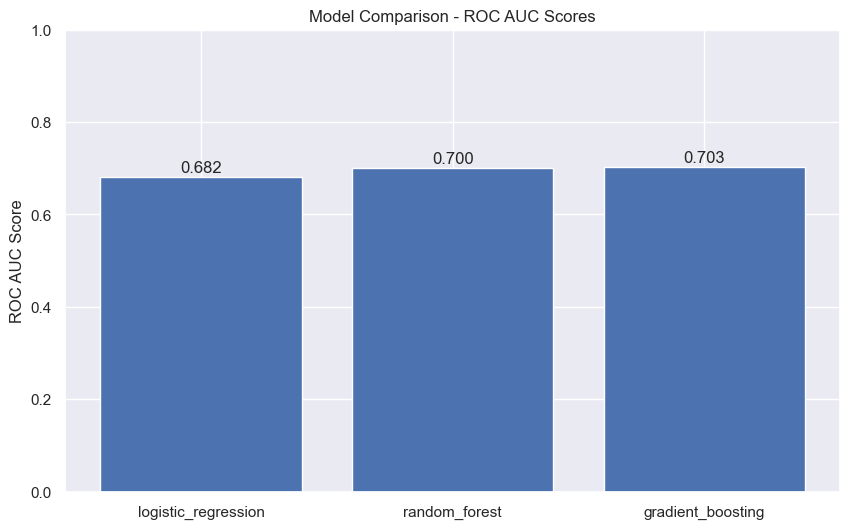

In [10]:
results = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # Load and preprocess data
    model.load('train_data.xlsx')
    X, y = model.preprocess(model.data)
    
    # Train model
    model.train(X, y)
    
    # Test model
    results[name] = model.test('test_data.xlsx')
    
    print(f"\n{name.upper()} Results:")
    print("\nClassification Report:")
    print(results[name]['classification_report'])
    print(f"ROC AUC Score: {results[name]['roc_auc']:.4f}")
    print(f"Average Precision Score: {results[name]['avg_precision']:.4f}")

    # Save model
    model.save(f'{name}_model.pkl')

# Visualize initial results
plt.figure(figsize=(10, 6))

# Create bar plot for ROC AUC scores
model_names = list(results.keys())
roc_scores = [results[name]['roc_auc'] for name in model_names]

plt.bar(model_names, roc_scores)
plt.title('Model Comparison - ROC AUC Scores')
plt.ylabel('ROC AUC Score')
plt.ylim(0, 1)

# Add value labels on top of each bar
for i, v in enumerate(roc_scores):
    plt.text(i, v + 0.01, f'{v:.3f}', ha='center')

plt.show()

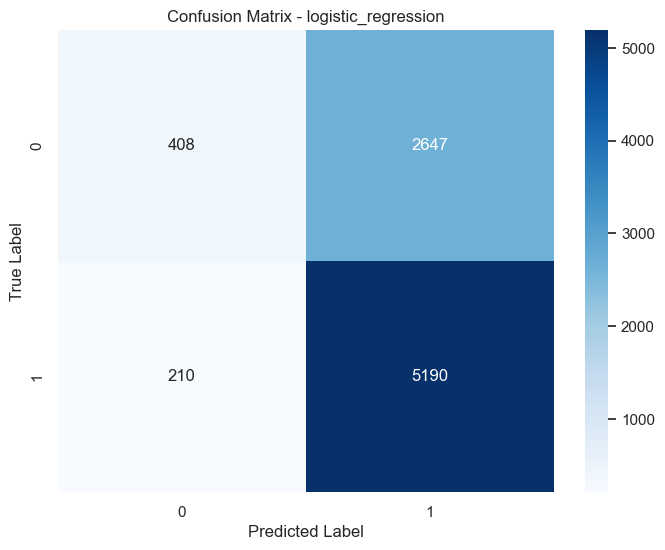

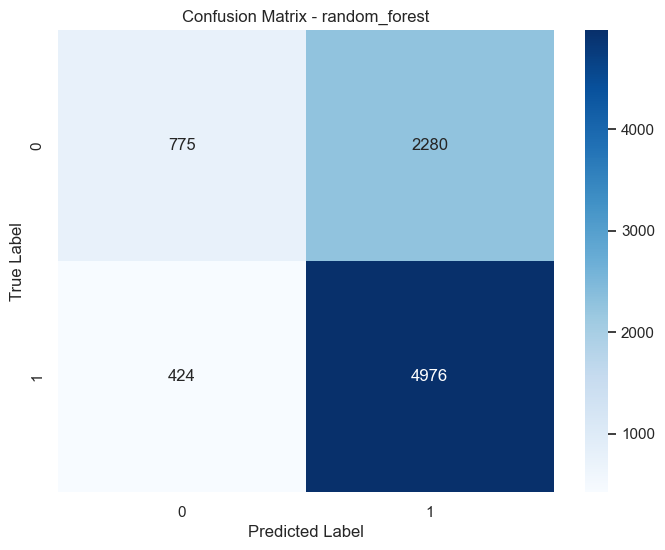

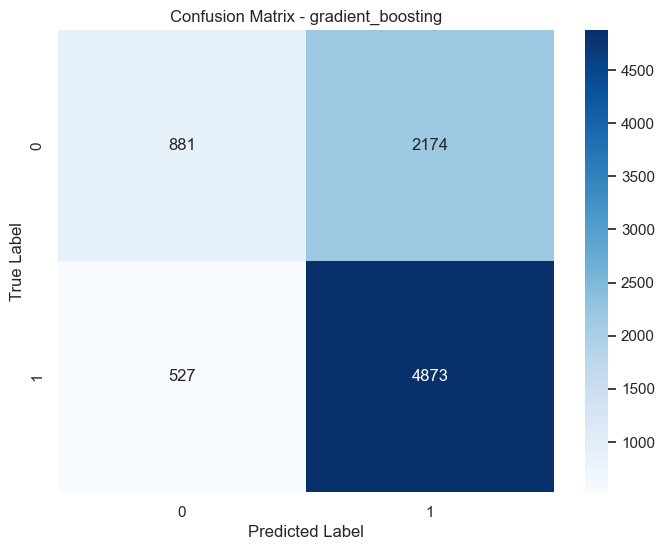

/Users/thejas/Desktop/Personal Projects/DSW Assignment/DSW_ML_Assignment-Dec24/model_.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[numerical_cols] = self.scaler.transform(X[numerical_cols])
/Users/thejas/Desktop/Personal Projects/DSW Assignment/DSW_ML_Assignment-Dec24/model_.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[numerical_cols] = self.scaler.transform(X[numerical_cols])
/Users/thejas/Desktop/Personal Projects/DSW Assignment/DSW_ML_Assignment-Dec24/model_.py:59: SettingWithCopyWarn

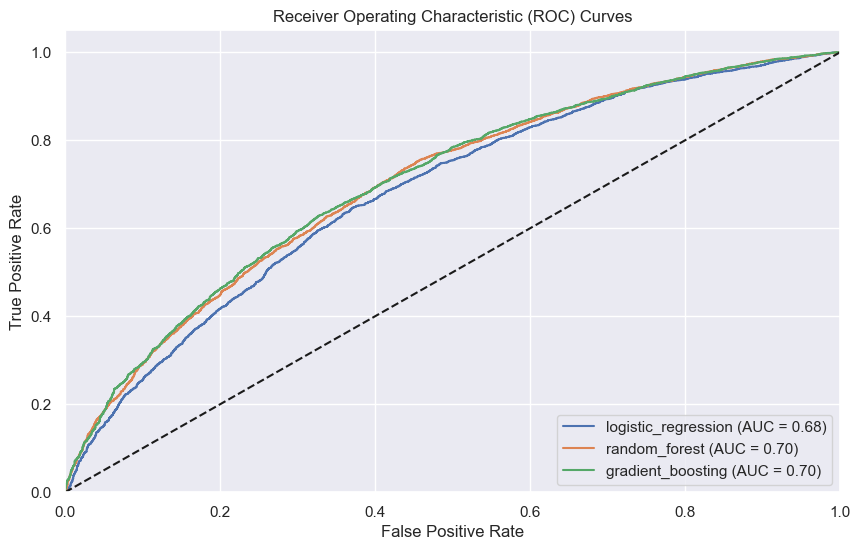

In [13]:
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Plot confusion matrix for each model
for name, result in results.items():
    plot_confusion_matrix(result['confusion_matrix'], f'Confusion Matrix - {name}')
plt.figure(figsize=(10, 6))

test_data = pd.read_excel('test_data.xlsx')

# Plot ROC curve for each model
for name, model in models.items():
    X_test, y_test = model.preprocess(test_data, is_training=False)
    y_pred_proba = model.predict(X_test)
    
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--') 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [14]:
print("\nPerforming hyperparameter tuning for Random Forest...")

rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf_model = RandomForestModel()
rf_model.load('train_data.xlsx')
X, y = rf_model.preprocess(rf_model.data)

grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    rf_param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

grid_search.fit(X, y)

print("\nBest parameters:", grid_search.best_params_)
print("Best ROC AUC score:", grid_search.best_score_)


Performing hyperparameter tuning for Random Forest...


/Users/thejas/Desktop/Personal Projects/DSW Assignment/DSW_ML_Assignment-Dec24/model_.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[numerical_cols] = self.scaler.fit_transform(X[numerical_cols])



Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best ROC AUC score: 0.5097358792499537



Training tuned Random Forest model...


/Users/thejas/Desktop/Personal Projects/DSW Assignment/DSW_ML_Assignment-Dec24/model_.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[numerical_cols] = self.scaler.fit_transform(X[numerical_cols])



Tuned Random Forest Results:

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.25      0.37      3055
           1       0.69      0.92      0.79      5400

    accuracy                           0.68      8455
   macro avg       0.66      0.59      0.58      8455
weighted avg       0.67      0.68      0.63      8455

ROC AUC Score: 0.7018
Average Precision Score: 0.7915


/Users/thejas/Desktop/Personal Projects/DSW Assignment/DSW_ML_Assignment-Dec24/model_.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[numerical_cols] = self.scaler.transform(X[numerical_cols])


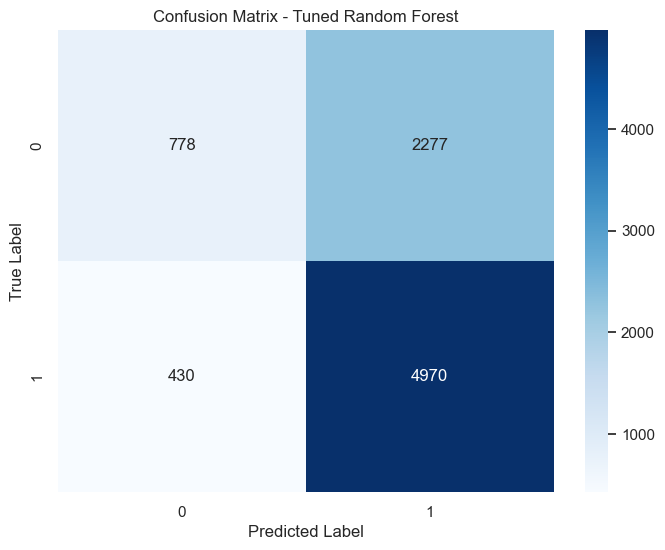


Final Model Performance Comparison:
              Model  ROC AUC  Average Precision
logistic_regression 0.681543           0.769909
      random_forest 0.700221           0.791401
  gradient_boosting 0.703492           0.795524
Tuned Random Forest 0.701833           0.791459


In [15]:
print("\nTraining tuned Random Forest model...")

tuned_rf = RandomForestModel(params=grid_search.best_params_)
tuned_rf.load('train_data.xlsx')
X, y = tuned_rf.preprocess(tuned_rf.data)
tuned_rf.train(X, y)

tuned_results = tuned_rf.test('test_data.xlsx')

print("\nTuned Random Forest Results:")
print("\nClassification Report:")
print(tuned_results['classification_report'])
print(f"ROC AUC Score: {tuned_results['roc_auc']:.4f}")
print(f"Average Precision Score: {tuned_results['avg_precision']:.4f}")

# Plot confusion matrix for tuned Random Forest
plot_confusion_matrix(tuned_results['confusion_matrix'], 'Confusion Matrix - Tuned Random Forest')

# Create final performance comparison
performance_metrics = {
    'Model': [],
    'ROC AUC': [],
    'Average Precision': []
}

for name, result in results.items():
    performance_metrics['Model'].append(name)
    performance_metrics['ROC AUC'].append(result['roc_auc'])
    performance_metrics['Average Precision'].append(result['avg_precision'])

# Add tuned Random Forest results
performance_metrics['Model'].append('Tuned Random Forest')
performance_metrics['ROC AUC'].append(tuned_results['roc_auc'])
performance_metrics['Average Precision'].append(tuned_results['avg_precision'])

performance_df = pd.DataFrame(performance_metrics)
print("\nFinal Model Performance Comparison:")
print(performance_df.to_string(index=False))


# Final Model Selection: Gradient Boosting Classifier

After evaluation of multiple models, I have selected the Gradient Boosting Classifier as our final model.
## Performance Metrics
- Highest ROC AUC score (0.703) among all models tested
- Best Average Precision score (0.796)
- Performance comparison:
  * Gradient Boosting: ROC AUC = 0.703, Avg Precision = 0.796
  * Random Forest: ROC AUC = 0.700, Avg Precision = 0.791
  * Tuned Random Forest: ROC AUC = 0.700, Avg Precision = 0.790
  * Logistic Regression: ROC AUC = 0.682, Avg Precision = 0.770


